Steps to implement Dirichlet Classifcation from scratch
========

1. Implement computeLogLikelihood:  
 - use scipy.special.poch to compute logLikelihood  
 - practicals for performance: use numpy sum instead of generic sum (10x performance difference for lexicon size vector)  
2. Implement ML estimation using fixed point iteration, as pointed out in Minka (2003)  


/app/dirichletClassification.py:89: RuntimeWarning: invalid value encountered in float_scalars
  return logFirstFraction + logSecondFractionArray.sum()


Elapsed Time for predicting dirichelt:  151.74358701705933


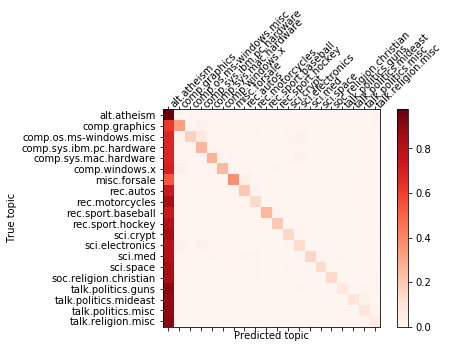

StatisticsError: variance requires at least two data points

In [54]:
%run dirichletClassification.py #for comparison between multi, and dirichlet

In [52]:
%run dirichletClassification.py

Topic average time is:  0.017971360683441163
Topic average time is:  0.018205034732818603
Topic average time is:  0.018135440349578858
Topic average time is:  0.018008887767791748
Topic average time is:  0.01958094835281372
Topic average time is:  0.01949901580810547
Topic average time is:  0.02004246711730957


KeyboardInterrupt: 

In [51]:
from scipy.special import gammaln
numP=10000
l = np.array( range( numP ))
l2 = np.array( range( 1, numP+1))
gammaNum = gammaln( l )
gammaNum = gammaln( l )
%timeit sum( gammaln(l + l2) - gammaln(l))
%timeit (gammaln(l+l2) - gammaln(l)).sum()
%timeit gammaln(l+l2) - gammaln(l)
%timeit sum(log(poch(l, l2)))
%timeit l + l2
%timeit np.add( l, l2 )

1.29 ms ± 15.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
595 µs ± 48.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
570 µs ± 36.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.


4.96 ms ± 384 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
6.28 µs ± 148 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
6.48 µs ± 315 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


ML Estimation for DCM with Fixed Point Algorithm
======
Step One: update with variable number of documents per parameter update  


Took on average  0.010001182556152344  per iteration in updating parameter 
Took on average  0.010139703750610352  per iteration in updating parameter 
Took on average  0.009975433349609375  per iteration in updating parameter 
Took on average  0.00981593132019043  per iteration in updating parameter 
Took on average  0.009985923767089844  per iteration in updating parameter 
Took on average  0.01001429557800293  per iteration in updating parameter 
Took on average  0.009932756423950195  per iteration in updating parameter 
Took on average  0.010515928268432617  per iteration in updating parameter 
Took on average  0.012171745300292969  per iteration in updating parameter 
Took on average  0.011327266693115234  per iteration in updating parameter 
Took on average  0.010673046112060547  per iteration in updating parameter 
Took on average  0.011989831924438477  per iteration in updating parameter 
Took on average  0.010785102844238281  per iteration in updating parameter 
Took on averag

/app/dirichletClassification.py:178: RuntimeWarning: invalid value encountered in double_scalars
  return logFirstFraction + logSecondFractionArray.sum()


Elapsed Time for predicting dirichlet:  186.20295906066895


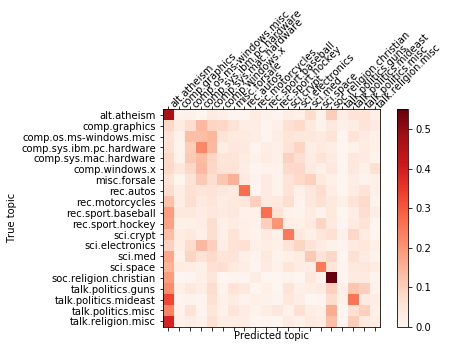

StatisticsError: variance requires at least two data points

In [6]:
%run dirichletClassification.py

Experiments with numDocsPerIteration = 1
------
It is interesting to see how long it takes to compute the update equation:  
- with numDocsPerIteration = 1, maxIter = num Documents in each topic used for weight updating  
e.g.) if maxIter = 2, then only 2 documents from training set was used for updating the final weights (unless fixed point algorithm converged from the first document)  

- on average, calculating the digammas take: 0.01 seconds / document  

Putting that into perspective:  
- SGD would take 0.01 seconds * numIterations * 1 * numTopics for learning the parameters  
- GD (with whole topics) would take 0.01 seconds * numIter * numDocsPerUpdate * numTopics  
Each topic has a variable number of documents per topic.  
For the 20_newsgroup with 20K document, let's say avg numDocsPerUpdate for GD = 1K -> traingin parmaeters with GD would take 0.01 s * 1000 * 1K * 20 = 200K seconds (55 hours)  

General Equation for calculating time for ML estimation for a topic
---------
Let number of documents per iteration = docPerIter  
Then in the worst case, it would take: maxIter * docPerIter * 0.01s  
Number of documents used for training per topic: maxIter * docPerIter (same document used multiple times across updates are counted as distinct documents for each update)  

For the GD: maxIter = 1000, docPerIterAvg = 1000, -> GD per topic: 10k sec (2.7 hours), 1M documents per topic  
With SGD: maxIter = 1000, docPerIter = single digit -> SGD per topic: 100 sec (2 mins), 10K documents per topic  

In [ ]:
%run dirichletClassification.py 5 2 2 7 #maxIter, numDocsPerIteration, numSplits, powerThreshold